In [74]:
import pandas as pd
import pyreadstat as ps
from functools import reduce
import matplotlib.pyplot as plt


In [75]:
og_aut, aut_meta = ps.read_sav('MPNWAVE8_AUTOdata.sav')
og_dab, dab_meta = ps.read_sav('MPNWAVE8_DAGBOEKdata.sav')
og_dag, dag_meta = ps.read_sav('MPNWAVE8_DAGdata.sav')
og_hhd, hhd_meta = ps.read_sav('MPNWAVE8_HHdata.sav')
og_pda, pda_meta = ps.read_sav('MPNWAVE8_Pdata.sav')
og_pbz, pbz_meta = ps.read_sav('MPNWAVE8_Pdata_bijzonder.sav')
og_wee, wee_meta = ps.read_sav('MPNWAVE8_weegfactoren.sav')

In [76]:
display(og_pda.columns.tolist())

['HHID',
 'HH_VALID',
 'DEELNAME',
 'IMPHHDATA',
 'P_VALID',
 'PERSID',
 'DEELNAMEP',
 'JAAR',
 'GESLACHT',
 'POSITIEHH',
 'HERKOMST_w5',
 'WERKSITUATIE_MEEST_w5',
 'WERKSITUATIE_ANDERS1',
 'WERKSITUATIE_ANDERS2',
 'WERKSITUATIE_ANDERS3',
 'WERKSITUATIE_ANDERS4',
 'WERKSITUATIE_ANDERS5',
 'WERKSITUATIE_ANDERS6',
 'WERKSITUATIE_ANDERS7',
 'WERKSITUATIE_ANDERS8',
 'WERKZAAM',
 'SECTORWERK',
 'OPLEIDING',
 'FUNCTIE_WERK',
 'WERKURENRECENT',
 'WERKURENRECENT_CONTINU',
 'N_URENVAST',
 'N_URENVAST_CONTINU',
 'N_URENTHUIS',
 'N_URENTHUIS_CONTINU',
 'N_URENELDERS',
 'N_URENELDERS_CONTINU',
 'N_URENONDERWEG',
 'N_URENONDERWEG_CONTINU',
 'VVM_WERK_w5',
 'RIJBEWIJS',
 'RIJBEWIJS_AUTO',
 'RIJBEWIJS_MOTOR',
 'RIJBEWIJS_BROM_w5',
 'RIJBEWIJS_VRACHT_w5',
 'PVVM',
 'PAUTO',
 'PHYBRID',
 'PBESTEL',
 'PMOTOR',
 'PBROM',
 'PSNOR',
 'PFIETS',
 'PVOUWFIETS',
 'PEBIKE',
 'PSCOOT',
 'PPEDEL',
 'POVERIG',
 'STELLING_PARK',
 'STELLING_AUTO',
 'STELLING_FIETS_w5',
 'STELLING_OV',
 'VVM_VOORKEUR_w5_WERK',
 'VVM_

In [77]:
# aut cleaned
aut_dropcols = ['KENTEKENS_INGEVULD', 'AUTO1_BRANDSTOF_A_w6', 'AUTO1_BRANDSTOF_B_w6', 'AUTO1_BIJTELLING_w5', 'AUTO1_GEWMAX', 'AUTO1_GEWLEEG',  'AUTO1_HLID5', 'AUTO1_HLID6', 'AUTO1_HLID7', 'AUTO1_HLID8', 'AUTO1_HLID9', 'AUTO1_HLID10', 'AUTO1_HLID11', 'AUTO1_HLID12', 'AUTO1_HLID13', 'AUTO2_BRANDSTOF_A_w6', 'AUTO2_BRANDSTOF_B_w6', 'AUTO2_BIJTELLING_w5','AUTO2_GEWMAX', 'AUTO2_GEWLEEG', 'AUTO2_HLID5', 'AUTO2_HLID6', 'AUTO2_HLID7', 'AUTO2_HLID8', 'AUTO2_HLID9', 'AUTO2_HLID10', 'AUTO2_HLID11', 'AUTO2_HLID12', 'AUTO2_HLID13', 'AUTO3_BRANDSTOF_A_w6', 'AUTO3_BRANDSTOF_B_w6', 'AUTO3_BIJTELLING_w5', 'AUTO3_GEWMAX', 'AUTO3_GEWLEEG', 'AUTO3_HLID5', 'AUTO3_HLID6', 'AUTO3_HLID7', 'AUTO3_HLID8', 'AUTO3_HLID9', 'AUTO3_HLID10', 'AUTO3_HLID11', 'AUTO3_HLID12','AUTO3_HLID13','AUTO4_GEWLEEG', 'AUTO4_BRANDSTOF_A_w6', 'AUTO4_BRANDSTOF_B_w6', 'AUTO4_BIJTELLING_w5','AUTO4_HLID5', 'AUTO4_HLID6', 'AUTO4_HLID7', 'AUTO4_HLID8', 'AUTO4_HLID9', 'AUTO4_HLID10', 'AUTO4_HLID11', 'AUTO4_HLID12', 'AUTO4_HLID13', 'AUTO5_BRANDSTOF_A_w6', 'AUTO5_BRANDSTOF_B_w6', 'AUTO5_BIJTELLING_w5', 'AUTO5_GEWMAX', 'AUTO5_GEWLEEG', 'AUTO5_HLID5', 'AUTO5_HLID6', 'AUTO5_HLID7', 'AUTO5_HLID8', 'AUTO5_HLID9', 'AUTO5_HLID10', 'AUTO5_HLID11', 'AUTO5_HLID12', 'AUTO5_HLID13',]
aut_80nan = og_aut.columns[og_aut.isna().mean() > 0.8].tolist()
aut_drop = aut_dropcols + aut_80nan
aut = og_aut.drop(columns=aut_drop, axis=1)


In [78]:
# dab cleaning
dab_dropcols = []
dab_80nan = og_dab.columns[og_dab.isna().mean() > 0.8].tolist()
dab_drop = dab_dropcols + dab_80nan
dab = og_dab.drop(columns=dab_drop, axis=1)

In [79]:
# dag cleaning
dag_dropcols = []
dag_80nan = og_dag.columns[og_dag.isna().mean() > 0.8].tolist()
dag_drop = dag_dropcols + dag_80nan
dag = og_dag.drop(columns=dag_drop, axis=1)

In [80]:
# hhd cleaned

hhd_dropcols = ['PROV', 'HHMOTOR', 'HHBROM', 'HHSNOR', 'HHFIETS', 'HHVOUWFIETS', 'HHEBIKE', 'HHPEDEL', 'HHSCOOT', 'HHOVG', 'HHGEEN', 'KENTEKENINFO', 'woonpc2']
hhd_80nan = og_hhd.columns[og_hhd.isna().mean() > 0.8].tolist()
hhd_drop = hhd_dropcols + hhd_80nan
hhd = og_hhd.drop(columns=hhd_drop, axis=1)

# hhd = hhd.drop(hhd[hhd['COROP'] != 23].index) # Greater-Amsterdam
# hhd = hhd.drop(hhd[hhd['STED_GM'] != 1].index) # high urbanization

In [81]:
#pda cleaning

pda_dropcols = ['HH_VALID']
pda_80nan = og_pda.columns[og_pda.isna().mean() > 0.8].tolist()
pda_drop = pda_dropcols + pda_80nan
pda = og_pda.drop(columns=pda_drop, axis=1)

In [82]:
#pbz cleaned
pbz_dropcols = ['OORDEEL_TREIN', 'OORDEEL_BTM', 'OORDEEL_FIETS', 'OORDEEL_BROMMER', 'OORDEEL_LOPEN', 'OORDEEL_VLIEGTUIG', 'GEBRUIK_TREIN_STELLING1', 'GEBRUIK_TREIN_STELLING2', 'GEBRUIK_TREIN_STELLING3', 'GEBRUIK_TREIN_STELLING4', 'GEBRUIK_TREIN_STELLING5', 'GEBRUIK_TREIN_STELLING6', 'GEBRUIK_TREIN_STELLING7', 'GEBRUIK_BTM_STELLING1', 'GEBRUIK_BTM_STELLING2', 'GEBRUIK_BTM_STELLING3', 'GEBRUIK_BTM_STELLING4', 'GEBRUIK_BTM_STELLING5', 'GEBRUIK_BTM_STELLING6', 'GEBRUIK_BTM_STELLING7', 'GEBRUIK_FIETS_STELLING1', 'GEBRUIK_FIETS_STELLING2', 'GEBRUIK_FIETS_STELLING3', 'GEBRUIK_FIETS_STELLING4', 'GEBRUIK_FIETS_STELLING5', 'GEBRUIK_FIETS_STELLING6', 'GEBRUIK_FIETS_STELLING7', 'GEBRUIK_LOPEN_STELLING1', 'GEBRUIK_LOPEN_STELLING2', 'GEBRUIK_LOPEN_STELLING3', 'GEBRUIK_LOPEN_STELLING4', 'GEBRUIK_LOPEN_STELLING5', 'GEBRUIK_LOPEN_STELLING6', 'GEBRUIK_LOPEN_STELLING7', 'VVM_TOEKOMST_ANDERS_TREIN', 'VVM_TOEKOMST_ANDERS_BTM', 'VVM_TOEKOMST_ANDERS_FIETS', 'VVM_TOEKOMST_ANDERS_BROM', 'VVM_TOEKOMST_ANDERS_LOPEN', 'VVM_TOEKOMST_ANDERS_VLIEGTUIG', 'COR_OV_VOORHEEN_TREIN', 'COR_OV_VOORHEEN_BTM', 'COR_BTM_SUBST_1', 'COR_BTM_SUBST_2', 'COR_BTM_SUBST_5', 'COR_TREIN_SUBST_1', 'COR_TREIN_SUBST_2', 'COR_TREIN_SUBST_4', 'COR_OV_SUBST_FIETS_ERV_S1', 'COR_OV_SUBST_FIETS_ERV_S2', 'COR_OV_SUBST_FIETS_ERV_S3', 'COR_OV_SUBST_BROM_ERV_S1', 'COR_OV_SUBST_BROM_ERV_S2', 'COR_OV_SUBST_BROM_ERV_S3', 'COR_OV_SUBST_LOOP_ERV_S1', 'COR_OV_SUBST_LOOP_ERV_S2', 'COR_OV_SUBST_LOOP_ERV_S3']
pbz_80nan = og_pbz.columns[og_pbz.isna().mean() > 0.8].tolist()
pbz_drop = pbz_dropcols + pbz_80nan
pbz = og_pbz.drop(columns=pbz_drop, axis=1)


In [83]:
all = [aut, dab, hhd, pda]

movement = [dag, pda, pbz]

In [84]:
for i, df in enumerate(all):
    if not isinstance(df, (pd.DataFrame, pd.Series)):
        print(f"Element {i} is of type {type(df)}, not a Pandas DataFrame or Series.")

In [85]:
merged = pd.concat(all, join='inner', axis=1).fillna(0)
merged = merged.loc[:, ~merged.columns.duplicated()] # drop duplicates
#merged = pd.merge(merged, pda[['HHID', 'OPLEIDING']], on='HHID', how='left')
#merged = pd.merge(merged, pda[['HHID', 'KLEEFT2']], on='HHID', how='left')



In [86]:
# Correlation matrix
column_headers = merged.columns
for columns in column_headers:
    print(columns)

HHID
HH_VALID
IMPHHDATA
DEELNAMEHH
JAAR
HHAUTO_N
AUTO1
AUTO1_KM
AUTO1_AANSCHAF
AUTO1_HFDGBR
AUTO1_INRICHT
AUTO1_PRIVE
AUTO1_HLID1
AUTO1_HLID2
AUTO1_HLID3
AUTO2
AUTO2_KM
AUTO2_AANSCHAF
AUTO2_HFDGBR
AUTO2_PRIVE
AUTO2_HLID1
AUTO3
AUTO4
AUTO5
KAUTO1_BOUWJAAR
KAUTO2_BOUWJAAR
PERSOON
PERSID
P_VALID
VPLID
WEGGEWEEST
VERTREKP
AANTVPL
VPLDAGNR
VERPL
VERPLNR
TOER
TOER_TYPE
AANTRIT
DOEL
MOTIEF
KMOTIEF
VERTPROV
AANKPROV
AFSTV
AFSTV_ORG
G_AFSTAND
KAFSTV
HVM
KHVM
KVERTTIJD
REISDUUR
KREISDUUR
REISDUUR_ORG
G_REISDUUR
ROLAUTO
PARKEERKOSTEN
VERTRAGING
AutoSoort
RitID
RIT
RITNR
RVM
KRVM
Bestuurder
SAMENREIZEN
CORRECTIE_VVM
MARKERING_VVM
CORRECTIE_AFSTAND
CORRECTIE_REISTIJD
MARKERING_REISTIJD1
MARKERING_REISTIJD2
MARKERING_AFSTAND
MARKERING_OVERIG
vlokatie_centrumsgw
vlokatie_opafrit
vlokatie_icknooppunt
vlokatie_station
vlokatie_metrosneltramhalte
vlokatie_tramhalte
vlokatie_bushalte4xpu
vlokatie_bushalte2xpu
vlokatie_bushalte1xpu
vlokatie_bushaltekl1xpu
alokatie_centrumsgw
alokatie_opafrit
alokatie_ickn

In [87]:
move = dag.merge(pda, on = 'PERSID', how='inner').fillna(0)
move = move.loc[:, ~move.columns.duplicated()] # drop duplicates
display(move.head())

,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0


In [88]:
# display(move['HHID_x'].value_counts())
# display(move['PERSID'].value_counts())
# display(move)


move.sort_values(by='HHID_x', inplace=True)

# Create a dictionary to store DataFrames split by 'HHID_x'
split_dfs = {}
prev_HHID = None
start_idx = 0

for idx, row in move.iterrows():
    current_HHID = row['HHID_x']
    
    if current_HHID != prev_HHID and prev_HHID is not None:
        split_dfs[prev_HHID] = move.iloc[start_idx:idx]
        start_idx = idx
    
    prev_HHID = current_HHID

# Store the last group
split_dfs[prev_HHID] = move.iloc[start_idx:]

# Now split_dfs contains DataFrames for each unique 'HHID_x'
# for key, df in split_dfs.items():
    # print(f"DataFrame for HHID_x {key}:")
    # print(df)
    # print("\n") 

# Accessing a specific DataFrame from the dictionary
specific_HHID_df = split_dfs[30000715.0]

# Print the DataFrame or perform operations on it
display(specific_HHID_df)

,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
5,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0


Algorithm found 4 clusters.
Points per cluster: Counter({1: 81, 0: 74, 3: 73, 2: 72})
True labels have 4 clusters.
Points per cluster for true labels: Counter({1: 75, 3: 75, 0: 75, 2: 75})
Silhouette Score: 0.5801493524075835



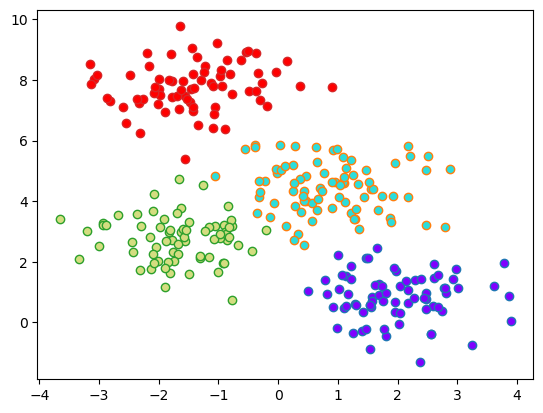

In [89]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

X = hhd
Y = X

# Function to plot true labels and cluster labels side by side
def plot_true_vs_clustered(X, true_labels, cluster_labels, cluster_centers=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot true labels
    axs[0].set_title('True Labels')
    unique_true_labels = set(true_labels)
    colors_true = plt.cm.rainbow(np.linspace(0, 1, len(unique_true_labels)))
    for k, col in zip(unique_true_labels, colors_true):
        class_member_mask = (true_labels == k)
        xy = X[class_member_mask]
        axs[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Plot clustered labels
    axs[1].set_title('Clustered Labels')
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        axs[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        if cluster_centers is not None and k != -1:
            center = cluster_centers[k]
            axs[1].plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markeredgewidth=2, markersize=14)

    plt.show()

# Function to plot the first two columns
def plot_clustered(X, cluster_centers):
    X = np.asarray(X)
    nfeature = X.shape[-1]
    if nfeature > 2:
        X = X[:,:2]
    if nfeature < 2:
        print("Error")
    # Plot clustered labels
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col)
    plt.show()

# Generate synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# KMeans crucial parameters: n_clusters, init, n_init, max_iter, random_state
# This is the method
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X)

### The algorithm end here, the following code calculates the number of each clusters and plots it
cluster_counts = Counter(cluster_labels)
print(f"Algorithm found {len(cluster_counts)} clusters.")
print("Points per cluster:", cluster_counts)
true_label_counts = Counter(true_labels)
print(f"True labels have {len(true_label_counts)} clusters.")
print("Points per cluster for true labels:", true_label_counts)

# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X, cluster_labels)}\n")

# Plot true labels vs. clustering results
plot_clustered(X, cluster_labels)
#plot_true_vs_clustered(X, true_labels, cluster_labels)

In [90]:
correlation_matrix = Y.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                                 HHID  HH_VALID  IMPHHDATA  DEELNAMEHH  \
HHID                         1.000000 -0.133145  -0.109311    0.649006   
HH_VALID                    -0.133145  1.000000   0.443932   -0.135960   
IMPHHDATA                   -0.109311  0.443932   1.000000   -0.117451   
DEELNAMEHH                   0.649006 -0.135960  -0.117451    1.000000   
PERSID_GK                    1.000000 -0.132613  -0.104941    0.648113   
JAAR                              NaN       NaN        NaN         NaN   
STED_GM                      0.004584 -0.055114  -0.035112    0.015491   
COROP                       -0.033422  0.014409   0.026120   -0.024775   
HHPERS                       0.020047 -0.273976  -0.061623    0.002786   
HHSAM                        0.257555 -0.167729  -0.508723    0.173216   
GEZINSCYCLUS                -0.017191 -0.190027  -0.032484    0.019582   
N_KIND                      -0.092378 -0.055362  -0.042640   -0.042504   
HHBRUTOINK2_w5              -0.042332 

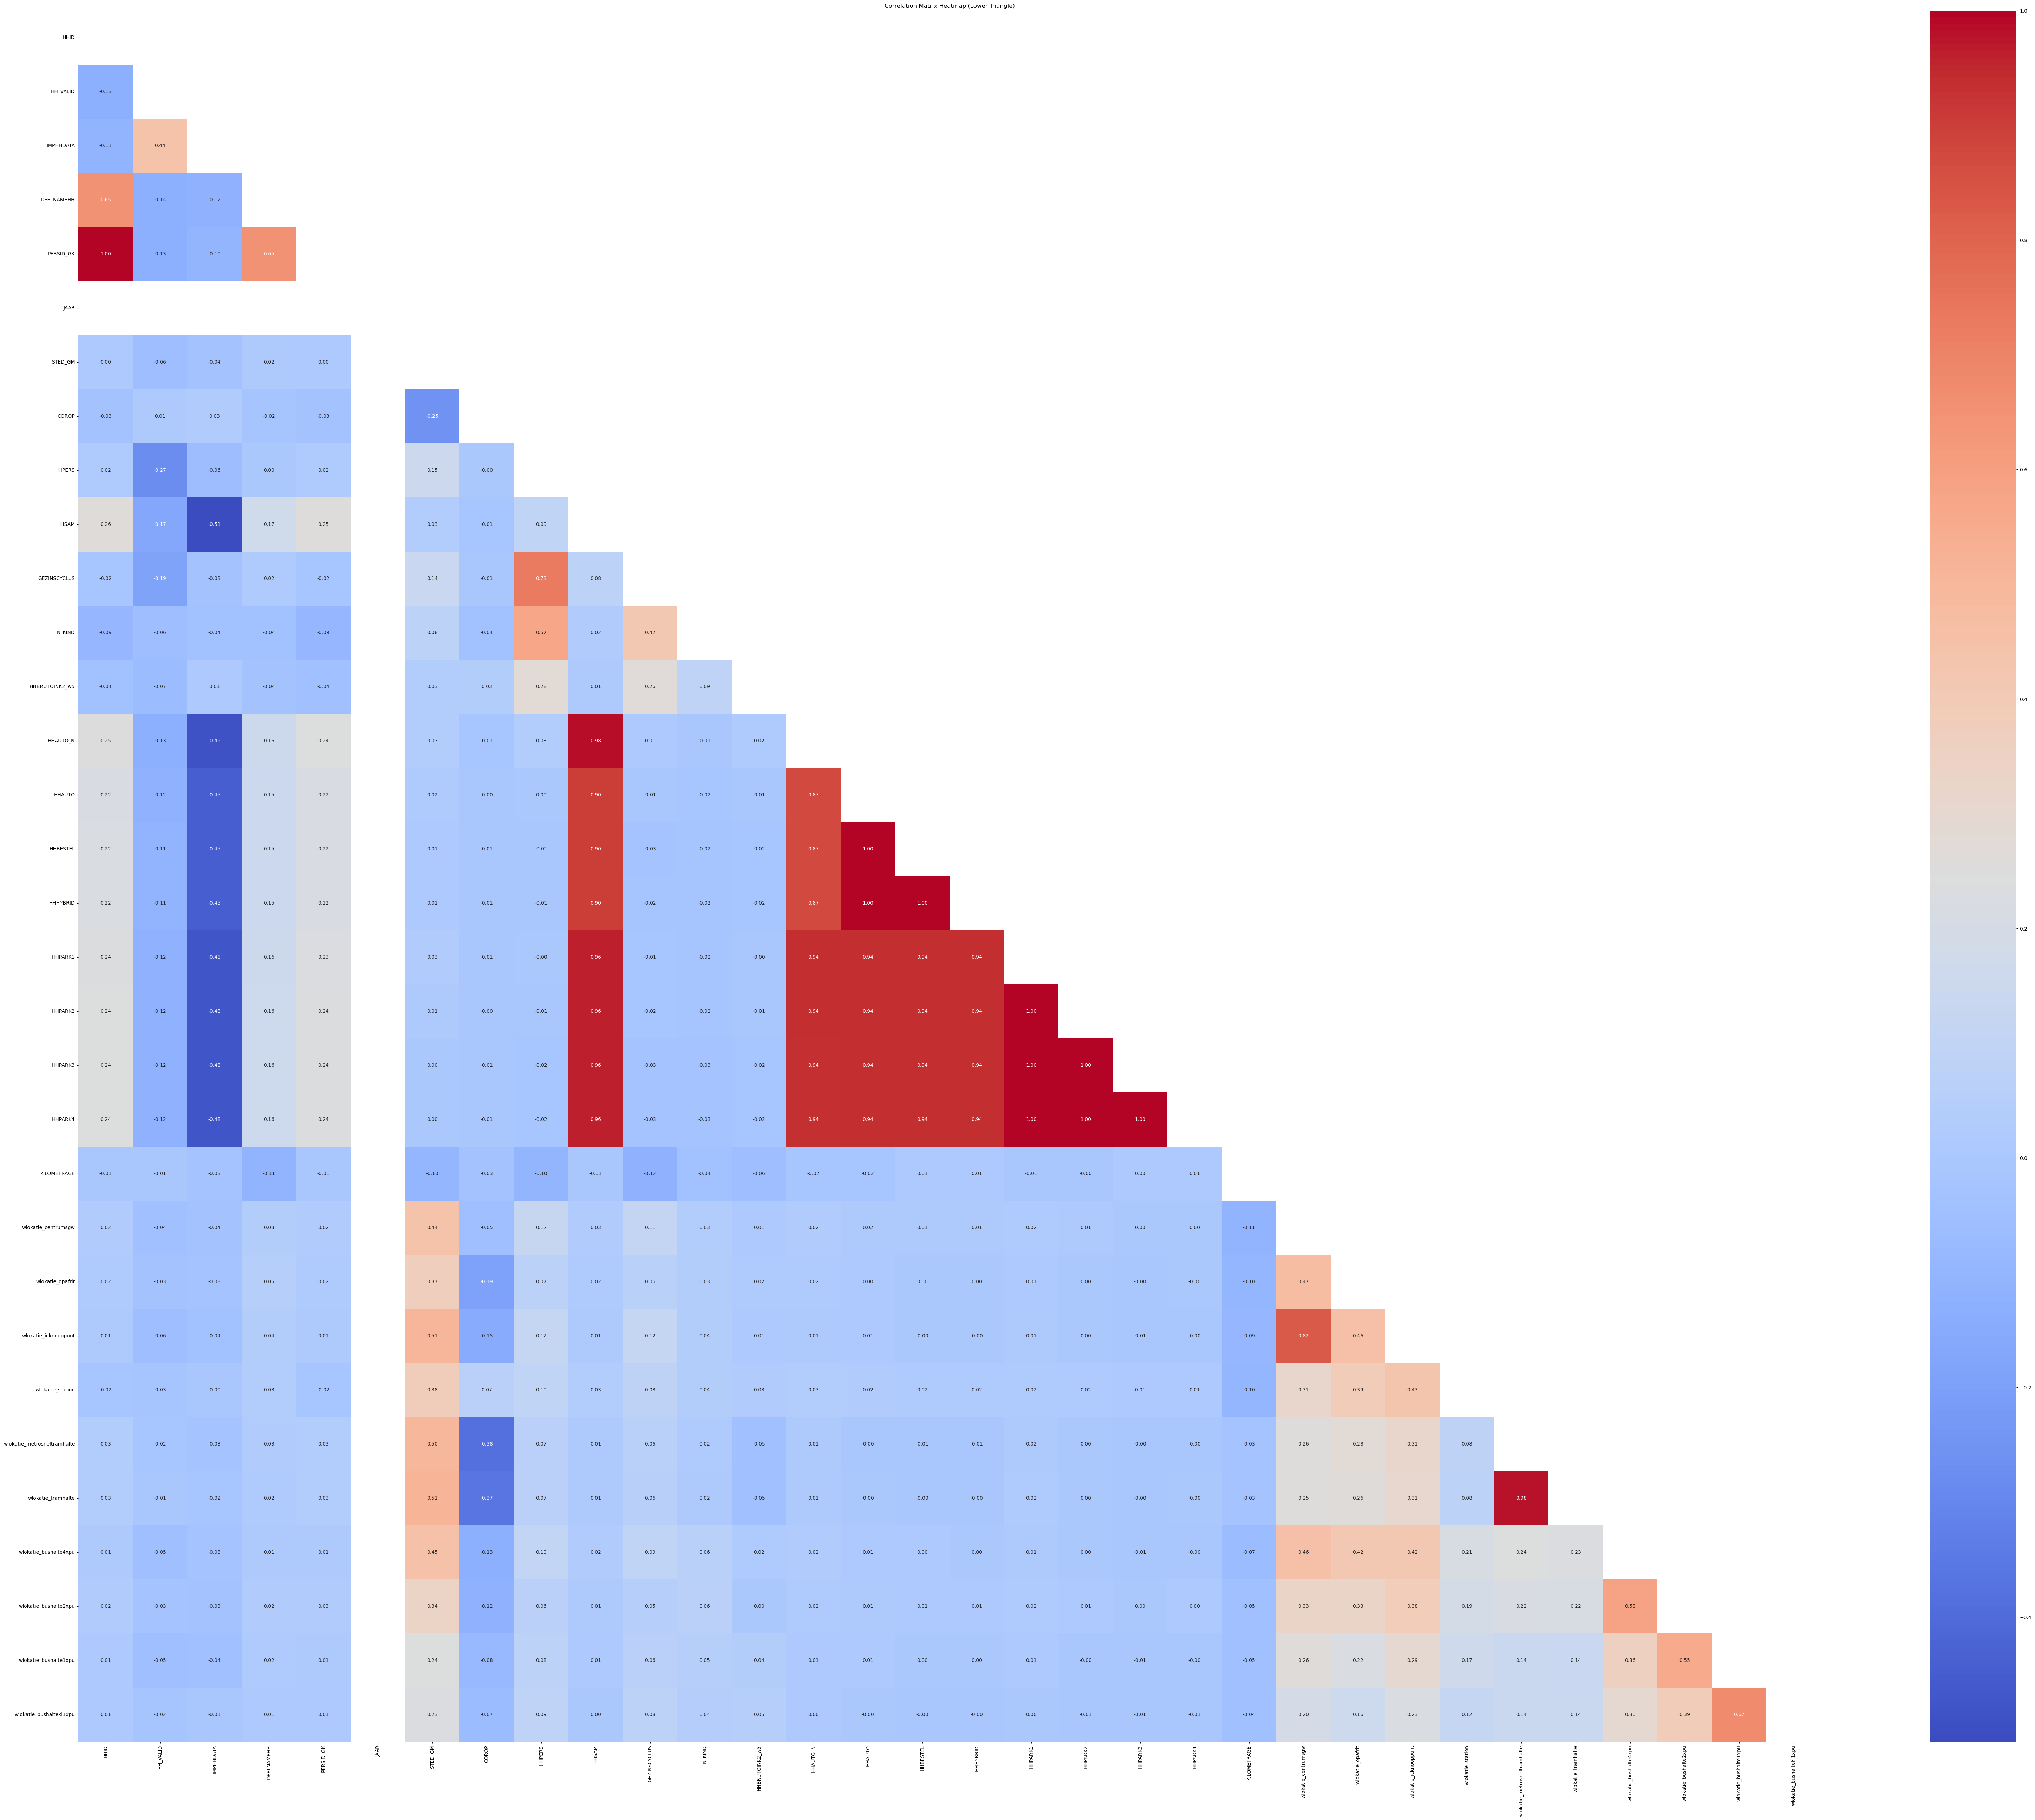

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your computed correlation matrix

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn with masked upper triangle
plt.figure(figsize=(80, 64))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Lower Triangle)')
plt.show()

graph hypothesis 1

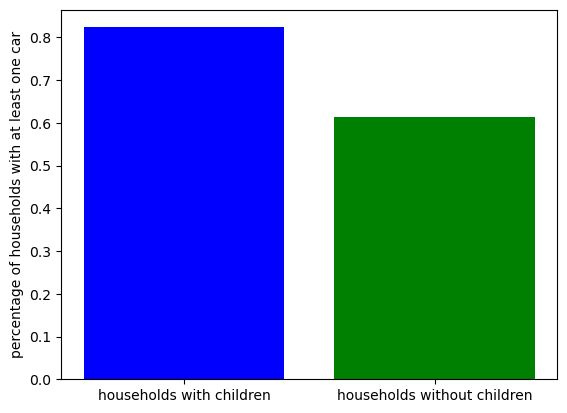

In [92]:
#create dataframe with only respondent in the Amsterdam are
amsterdam_data = merged[merged['COROP']==23]

#creating variable to count households
hh_with_kids = 0
hh_withno_kids = 0
hh_with_kids_with_cars = 0
hh_withno_kids_with_cars = 0

#counting all necessary values for the chart
for i in range(len(amsterdam_data)):
    if amsterdam_data.iloc[i]['N_KIND'] > 0:
        hh_with_kids += 1
        if amsterdam_data.iloc[i]['HHAUTO_N'] > 0:
            hh_with_kids_with_cars += 1
    if amsterdam_data.iloc[i]['N_KIND'] == 0:
        hh_withno_kids +=1
        if amsterdam_data.iloc[i]['HHAUTO_N'] > 0:
            hh_withno_kids_with_cars += 1
    i += 1

# Values and labels for the bars 
values = [hh_with_kids_with_cars/hh_with_kids, hh_withno_kids_with_cars/hh_withno_kids]
labels = ['households with children', 'households without children']

# Creating a bar chart
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('percentage of households with at least one car')
plt.show()


In [93]:
# making a graph 

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'OPLEIDING' column to categorical with specified order
opleiding_order = ['1.0', '3.0', '4.0', '6.0', '7.0', '8.0']
filtered_data.loc[:, 'OPLEIDING'] = pd.Categorical(filtered_data['OPLEIDING'], categories=opleiding_order, ordered=True)

columns_to_plot = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'HHAUTO_N', 'OPLEIDING']

column_names = {
    'HHBRUTOINK2_w5': 'income',
    'STED_GM': 'urbanisation',
    'N_KIND': 'number of children',
    'HHAUTO_N': 'number of cars',
    'OPLEIDING': 'education'
}

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 2 * len(columns_to_plot)))

# Ensure axes is always an iterable even for a single subplot
if len(columns_to_plot) == 1:
    axes = [axes]
for i, column in enumerate(columns_to_plot):
    sns.histplot(filtered_data[column], ax=axes[i], kde=True)
    axes[i].set_title(column_names.get(column, f'Column {column}'))

plt.tight_layout()
plt.show()


Principal Component Analysis

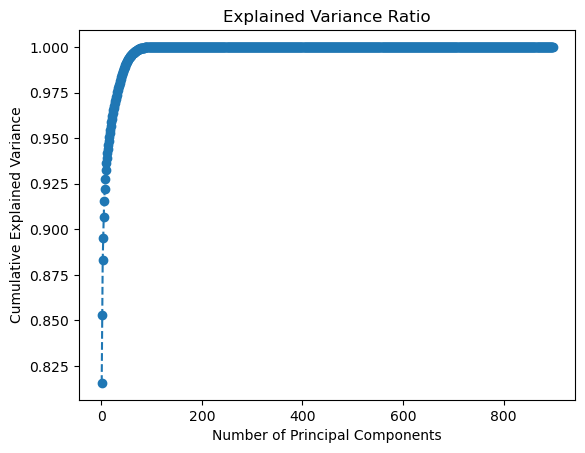

         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0 -12.841485  17.317078  1.717137  2.856681 -0.464961 -3.045139  1.571988   
1 -12.938444  16.412148  1.632432  3.772489 -1.118630 -3.358113  2.257476   
2 -12.100007  16.595163  2.070377 -4.357505 -0.323554 -3.372656 -0.370477   
3 -13.138738  17.640430  2.186121  2.643666 -0.107142  2.579106  0.307037   
4 -13.196623  17.135865  2.236588  3.518281 -0.122177  2.268357  0.487391   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  2.775895 -6.971143 -1.096969  0.763750 -0.884224 -1.917805  1.663117   
1  1.854293 -9.508398  4.223121  0.392628 -0.537638 -1.366830  0.350408   
2 -0.683801 -9.738055 -1.821827  3.483096 -0.213089 -1.050545 -0.431290   
3  0.402231 -7.675098 -1.048634 -0.337274 -0.462596 -1.189941  1.854961   
4  0.626180 -9.825016 -1.496719 -1.287696 -0.279365 -1.358673  0.552503   

       PC15      PC16  HHAUTO_N  
0 -1.286919 -1.694620       1.0  
1 -0.507388 -1.169

KHVM           0.173447
KRVM           0.173441
VERPLNR        0.173392
AANTVPL        0.173385
TOER           0.173381
AANKPC2        0.173378
WEGGEWEEST     0.173378
AANTRIT        0.173377
VERTREKP       0.173377
SAMENREIZEN    0.173350
RitID          0.173347
VPLID          0.173347
VERPL          0.173342
RIT            0.173334
TOER_TYPE      0.173331
KMOTIEF        0.173322
HVM            0.173253
RVM            0.173229
MOTIEF         0.173211
DOEL           0.173148
dtype: float64

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# get target variable
target_variable = 'HHAUTO_N'
X = merged.drop(target_variable, axis=1)  
y = merged[target_variable]  

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Access explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = explained_var_ratio.cumsum()
n_components_to_retain = (cumulative_var_ratio < 0.95).sum() + 1

# Visualize explained variance ratio
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

# Fit PCA again with the determined number of components
pca_final = PCA(n_components=n_components_to_retain)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i}' for i in range(1, n_components_to_retain + 1)]
pc_df = pd.DataFrame(data=X_pca_final, columns=pc_columns)
result_df = pd.concat([pc_df, y.reset_index(drop=True)], axis=1)

# Print the final DataFrame with principal components and the target variable
print(result_df.head())

# Access the loadings of the first two principal components and put them in a datafram
loadings_first_two_pc = pca.components_[:2, :]
loadings_df = pd.DataFrame(loadings_first_two_pc.T, columns=['PC1', 'PC2'], index=X.columns)

#rank them from highest to lowest influence
loadings_abs = loadings_df.abs()
loadings_abs_sum = loadings_abs.sum(axis=1)
ranked_features = loadings_abs_sum.sort_values(ascending=False)
display(ranked_features.head(20))

KHVM - Main transport mode class trip
KRVM - Class trip-segment transport mode

VERPLNR - trip number
AANTVPL - Number of trips per day
TOER - Departure point of trip is arrival point of trip (round trip)
AANKPC2 - Trip Arrival postal code (PC2)
WEGGEWEEST -

In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create separate groups based on 'age', 'gender', and 'education'
# Split age into 5 groups
merged['age_group'] = pd.cut(merged['KLEEFT2'], bins=5)

# Create a MultiIndex DataFrame grouping by 'age_group', 'gender', and 'education'
grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

# Independent variables (multiple predictors)
independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

# Create an empty list to store regression results
results_list = []

# Perform linear regression for each group
for group_name, group_data in grouped_data:
    # Extract the group's data
    X = group_data[independent_cols]  # Independent variables (predictors)
    y = group_data['HHAUTO_N']  # Dependent variable
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Fit the linear regression model
    model.fit(X, y)
    
    # Get coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_
    
    # Append results to the list
    results_list.append({
        'Segment': str(group_name),
        'Coefficients': coefficients[0],
        'Intercept': intercept
    })

# Convert the list of dictionaries to a DataFrame
regression_results = pd.DataFrame(results_list)

# Display regression results for each segment
print(regression_results)


                                             Segment  Coefficients  Intercept
0   (Interval(1.992, 3.6, closed='right'), 1.0, 1.0)      0.127921   0.408611
1   (Interval(1.992, 3.6, closed='right'), 1.0, 3.0)      0.060226   0.569940
2   (Interval(1.992, 3.6, closed='right'), 1.0, 4.0)      0.458493  -1.051724
3   (Interval(1.992, 3.6, closed='right'), 1.0, 5.0)      0.199647   0.363177
4   (Interval(1.992, 3.6, closed='right'), 1.0, 6.0)      0.243163  -0.391314
..                                               ...           ...        ...
78   (Interval(8.4, 10.0, closed='right'), 2.0, 5.0)      0.213747   0.191643
79   (Interval(8.4, 10.0, closed='right'), 2.0, 6.0)      0.309570  -0.266538
80   (Interval(8.4, 10.0, closed='right'), 2.0, 7.0)      0.118142   0.269112
81   (Interval(8.4, 10.0, closed='right'), 2.0, 8.0)      0.187861  -0.257225
82  (Interval(8.4, 10.0, closed='right'), 2.0, 99.0)      0.052993   0.478209

[83 rows x 3 columns]


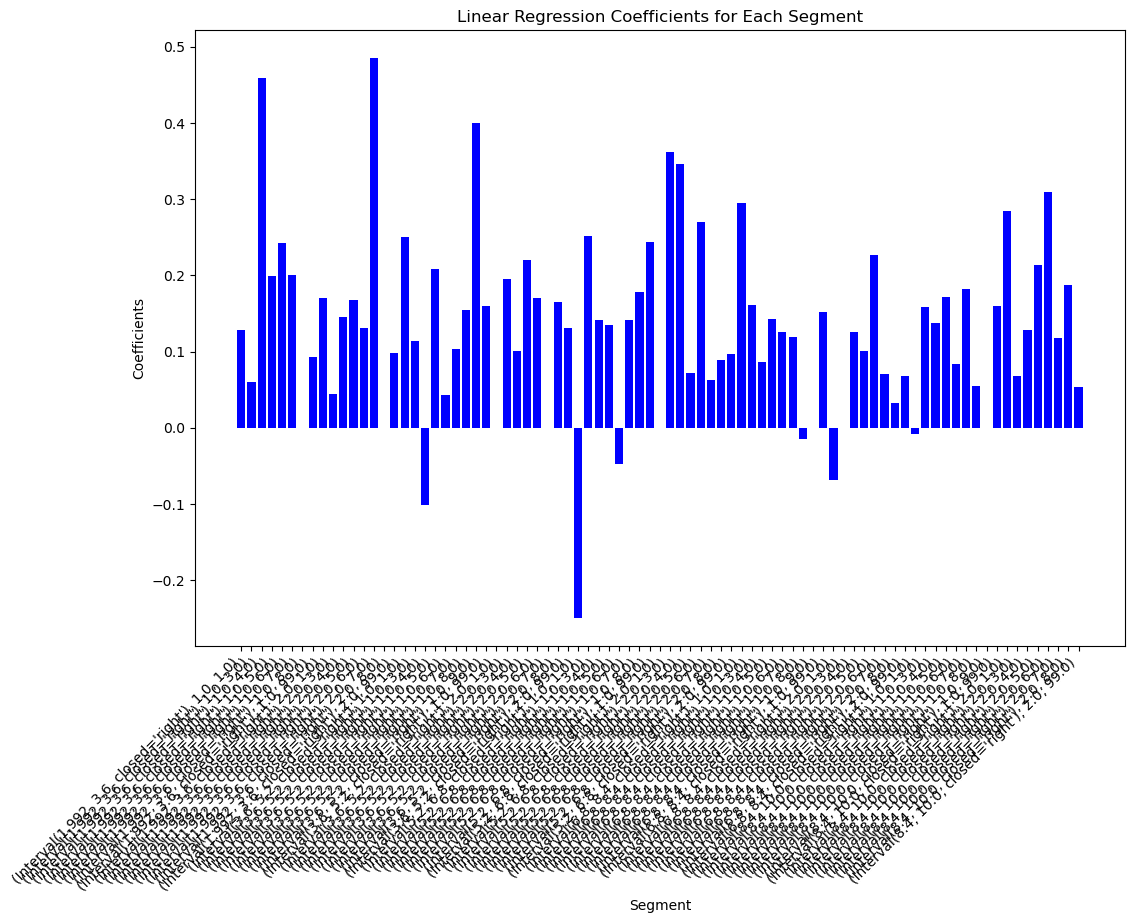

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.bar(regression_results['Segment'], regression_results['Coefficients'], color='blue')
plt.xlabel('Segment')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients for Each Segment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['HHID', 'HH_VALID', 'IMPHHDATA', 'DEELNAMEHH', 'JAAR', 'HHAUTO_N', 'AUTO1', 'AUTO1_KM', 'AUTO1_AANSCHAF', 'AUTO1_INRICHT', 'KILOMETRAGE', 'wlokatie_centrumsgw', 'wlokatie_opafrit', 'wlokatie_icknooppunt', 'wlokatie_station', 'wlokatie_metrosneltramhalte', 'wlokatie_tramhalte', 'wlokatie_bushalte4xpu', 'wlokatie_bushalte2xpu', 'wlokatie_bushalte1xpu', 'wlokatie_bushaltekl1xpu']

x = merged.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Get loadings for the first principal component
loadings = pca.components_[0]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top contributing features
print("Top contributing features to the first principal component:")
print(loadings_df)


Top contributing features to the first principal component:
                        Feature       Loading
13         wlokatie_icknooppunt  3.841242e-01
11          wlokatie_centrumsgw  3.663229e-01
17        wlokatie_bushalte4xpu  3.448456e-01
18        wlokatie_bushalte2xpu  3.371636e-01
12             wlokatie_opafrit  3.212014e-01
19        wlokatie_bushalte1xpu  2.965620e-01
15  wlokatie_metrosneltramhalte  2.762608e-01
16           wlokatie_tramhalte  2.722241e-01
20      wlokatie_bushaltekl1xpu  2.547814e-01
14             wlokatie_station  2.301352e-01
5                      HHAUTO_N  1.138221e-01
10                  KILOMETRAGE -8.452762e-02
9                 AUTO1_INRICHT  6.307504e-02
1                      HH_VALID -3.534848e-02
6                         AUTO1  1.866768e-02
0                          HHID  1.674466e-02
2                     IMPHHDATA -1.671554e-02
3                    DEELNAMEHH -6.915714e-04
8                AUTO1_AANSCHAF -2.033010e-04
7                   

In [65]:
# Standardize the data
features = ['HHID', 'HH_VALID', 'IMPHHDATA', 'DEELNAMEHH', 'JAAR', 'HHAUTO_N', 'AUTO1', 'AUTO1_KM', 'AUTO1_AANSCHAF', 'AUTO1_INRICHT', 'KILOMETRAGE', 'wlokatie_centrumsgw', 'wlokatie_opafrit', 'wlokatie_icknooppunt', 'wlokatie_station', 'wlokatie_metrosneltramhalte', 'wlokatie_tramhalte', 'wlokatie_bushalte4xpu', 'wlokatie_bushalte2xpu', 'wlokatie_bushalte1xpu', 'wlokatie_bushaltekl1xpu']

x = merged.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Get loadings for the first principal component
loadings = pca.components_[1]

# Create a DataFrame to show the features and their loadings
loadings_df = pd.DataFrame({'Feature': features, 'Loading': loadings})
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top contributing features
print("Top contributing features to the second principal component:")
print(loadings_df)

Top contributing features to the second principal component:
                        Feature       Loading
2                     IMPHHDATA -5.471080e-01
6                         AUTO1  5.470100e-01
5                      HHAUTO_N -3.599752e-01
9                 AUTO1_INRICHT -3.543135e-01
1                      HH_VALID -3.325320e-01
10                  KILOMETRAGE  1.237057e-01
0                          HHID  1.004632e-01
3                    DEELNAMEHH -7.234208e-02
15  wlokatie_metrosneltramhalte  3.213766e-02
14             wlokatie_station -3.005575e-02
16           wlokatie_tramhalte  2.721367e-02
19        wlokatie_bushalte1xpu  2.576295e-02
18        wlokatie_bushalte2xpu  2.035866e-02
7                      AUTO1_KM -1.895738e-02
8                AUTO1_AANSCHAF -1.892402e-02
13         wlokatie_icknooppunt  1.796097e-02
17        wlokatie_bushalte4xpu  1.095143e-02
11          wlokatie_centrumsgw  1.032237e-02
12             wlokatie_opafrit  9.939038e-03
20      wlokatie_bu

In [66]:
#replace existing nan values
def replace_nan_with_mean(df):
    return df.fillna(df.mean())

merged_filled = replace_nan_with_mean(merged)


/var/folders/bb/hkfpdvbn46vcqvd2x75jvk0h0000gn/T/ipykernel_20392/573875906.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return df.fillna(df.mean())


In [67]:
#use 6 important columns
important_columns = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'HHAUTO_N', 'OPLEIDING', 'KLEEFT2']
c6_merged = merged_filled[important_columns].copy()

print(c6_merged.head())


   HHBRUTOINK2_w5  STED_GM  N_KIND  HHAUTO_N  OPLEIDING  KLEEFT2
0             4.0      4.0     0.0       1.0        5.0      7.0
1             6.0      2.0     2.0       2.0        6.0      6.0
2             2.0      2.0     0.0       1.0        1.0      3.0
3             5.0      4.0     0.0       1.0        7.0      5.0
4             4.0      2.0     0.0       1.0        8.0      5.0


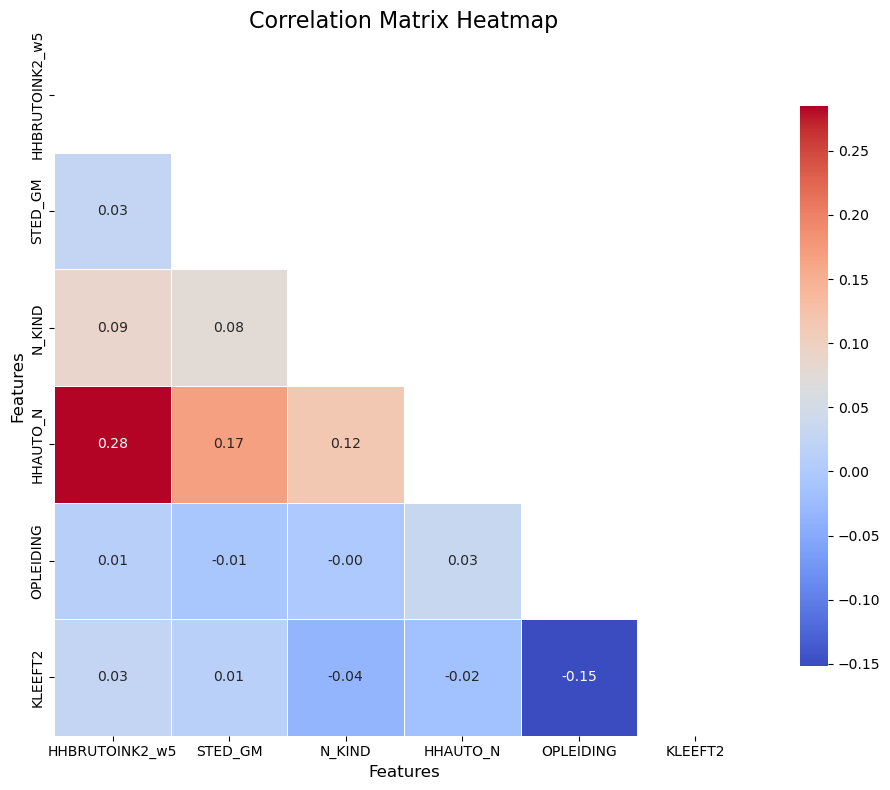

"\nreading the correlation matrix\n\n    'HHBRUTOINK2_w5': 'income',\n    'STED_GM': 'urbanisation',\n    'N_KIND': 'number of children',\n    'HHAUTO_N': 'number of cars',\n    'OPLEIDING': 'education'\n    'KLEEFT_2' : 'age'\n"

In [68]:
#correlation matrix of 6 column dataframe
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = c6_merged.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

'''
reading the correlation matrix

    'HHBRUTOINK2_w5': 'income',
    'STED_GM': 'urbanisation',
    'N_KIND': 'number of children',
    'HHAUTO_N': 'number of cars',
    'OPLEIDING': 'education'
    'KLEEFT_2' : 'age'
'''

In [69]:
#corr matrix for grouped data
'''
#split age into 5 groups
merged['age_group'] = pd.cut(merged['KLEEFT2'], bins=5)

#create a new df grouping by 'age_group', 'gender', and 'education'
grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

#corr for group
correlation_matrices = {}
for group_name, group_data in grouped_data:
    #get subset of data for a group
    group_subset = group_data[independent_cols]
    
    #calc correlation matrix
    correlation_matrix = group_subset.corr()
    
    # Store the correlation matrix for the group
    correlation_matrices[group_name] = correlation_matrix
'''

#calculate the correlation matrix
correlation_matrix = c6_merged.corr()

#set the threshold
threshold = 0.5

#find correlated elements
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)

#get pairs of elements
correlated_pairs = {}
for col in highly_correlated:
    correlated_cols = list(correlation_matrix.index[highly_correlated[col]])
    if correlated_cols:
        correlated_pairs[col] = correlated_cols

#show pairs
#for col, correlated_cols in correlated_pairs.items():
    #print(f"Column '{col}' is highly correlated with: {', '.join(correlated_cols)}")



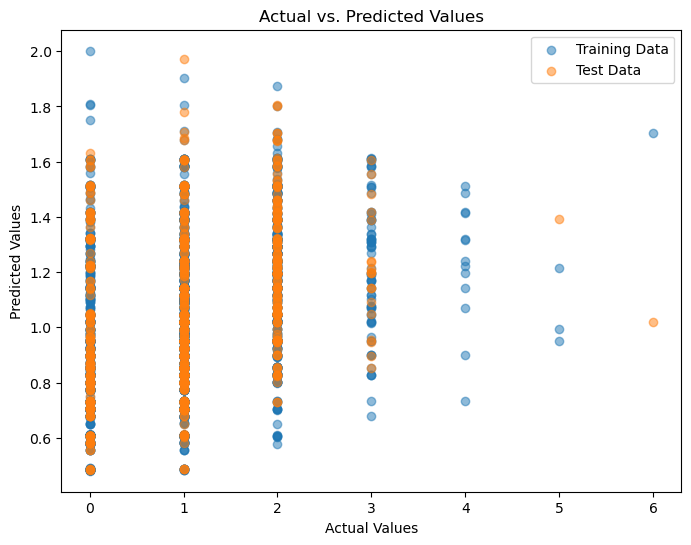

KeyError: 0

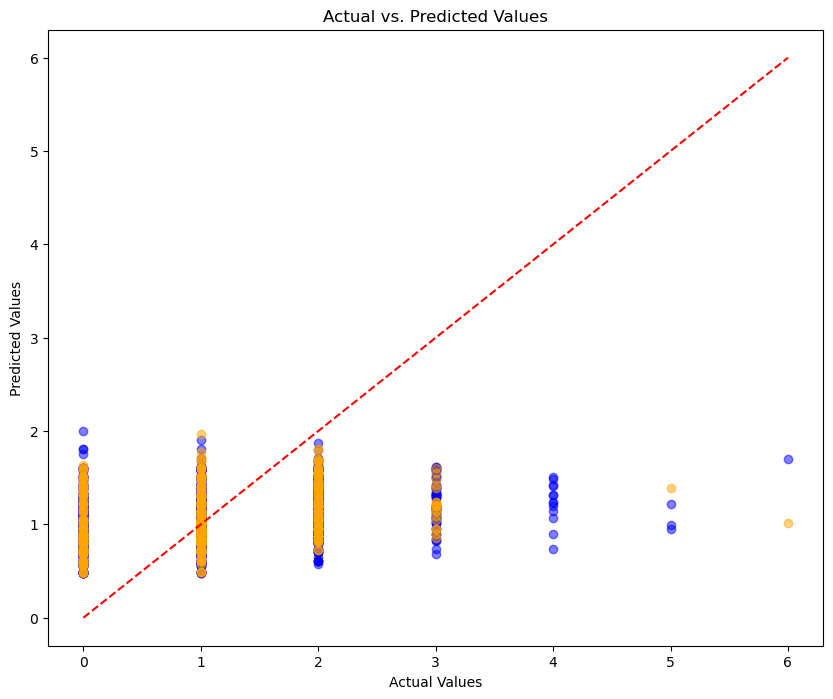

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#scaler = StandardScaler()

grouped_data = merged.groupby(['age_group', 'GESLACHT', 'OPLEIDING'])

#split dataset
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#hyperparameter tuning with GridSearchCV
model = LinearRegression()
#define hyperparameters
params = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}

grid_search = GridSearchCV(model, params, cv=5) 
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# plotting actual vs predicted values
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, label='Training Data', alpha=0.5)
plt.scatter(y_test, predictions_test, label='Test Data', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()



#plotting actual vs predicted numbers
plt.figure(figsize=(10, 8))
plt.scatter(y_train, predictions_train, label='Training Data', alpha=0.5, c='blue')
plt.scatter(y_test, predictions_test, label='Test Data', alpha=0.5, c='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

#line for perfect predictions
max_val = max(max(y_train), max(y_test), max(predictions_train), max(predictions_test))
plt.plot([0, max_val], [0, max_val], linestyle='--', color='red', label='Perfect Prediction Line')

#show numerical values
for i, txt in enumerate(y_train.index):
    plt.annotate(txt, (y_train[i], predictions_train[i]), fontsize=8, color='blue')
for i, txt in enumerate(y_test.index):
    plt.annotate(txt, (y_test[i], predictions_test[i]), fontsize=8, color='orange')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#evaluate model on test set
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
#print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


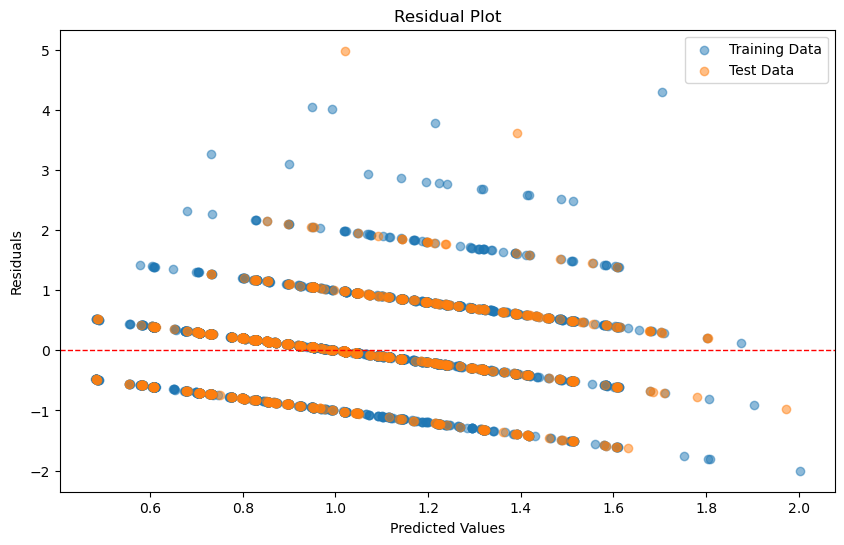

In [71]:
#plot residuals

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#split the dataset for our features
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#use linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(train_predictions, train_residuals, label='Training Data', alpha=0.5)
plt.scatter(test_predictions, test_residuals, label='Test Data', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()



In [72]:
#check if columns have a linear relationship to HHAUTO_N

# Perform linear regression for each independent column against the dependent column
for col in merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]:
    # Extract independent and dependent variables
    X = merged[[col]]
    y = merged['HHAUTO_N']
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Print model metrics
    print(f"Column '{col}' - R-squared: {model.score(X, y)}")




Column 'HHBRUTOINK2_w5' - R-squared: 0.08110340387193449
Column 'STED_GM' - R-squared: 0.02816957228320638
Column 'N_KIND' - R-squared: 0.013380917616691024
Column 'OPLEIDING' - R-squared: 0.001110084630321806
Column 'GESLACHT' - R-squared: 0.00017392499322133048


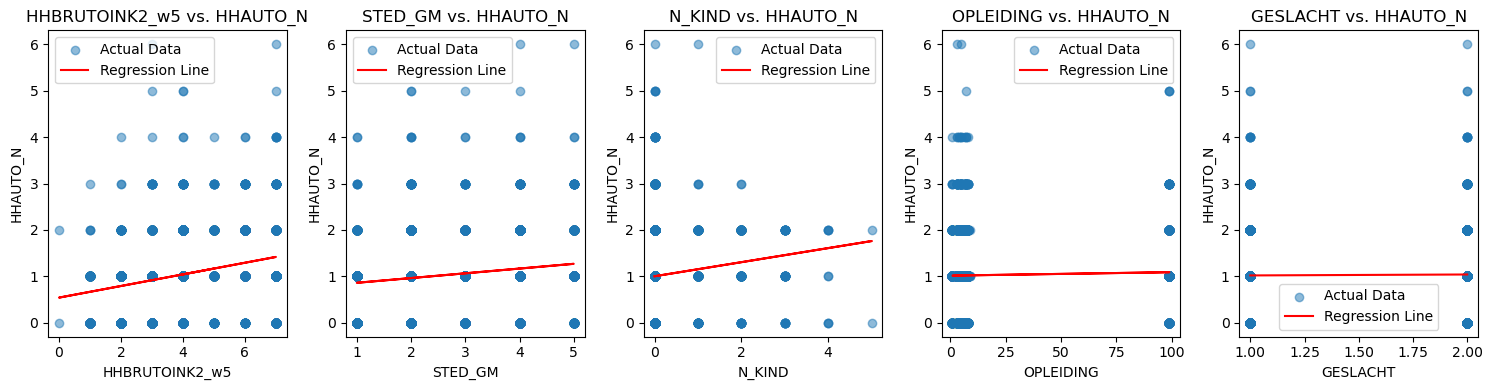

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# List of independent columns
independent_cols = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']
dependent_col = 'HHAUTO_N'

# Set up subplots
fig, axes = plt.subplots(1, len(independent_cols), figsize=(15, 4))

# Perform linear regression for each independent column against the dependent column
for i, col in enumerate(independent_cols):
    # Extract independent and dependent variables
    X = merged[[col]]
    y = merged[dependent_col]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predictions
    predictions = model.predict(X)
    
    # Plotting
    axes[i].scatter(X, y, label='Actual Data', alpha=0.5)
    axes[i].plot(X, predictions, color='red', label='Regression Line')
    axes[i].set_title(f'{col} vs. {dependent_col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(dependent_col)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [34]:
#anova test on columns

import statsmodels.api as sm
from statsmodels.formula.api import ols

dependent_variable = 'HHAUTO_N'

independent_columns = ['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']

#ANOVA test for each independent column
for col in independent_columns:
    formula = f"{dependent_variable} ~ C({col})"
    model = ols(formula, data=merged).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f"ANOVA for {col}:")
    print(anova_table)

ANOVA for HHBRUTOINK2_w5:
                        sum_sq      df          F         PR(>F)
C(HHBRUTOINK2_w5)   272.735047     7.0  74.676661  3.960315e-101
Residual           1821.932381  3492.0        NaN            NaN
ANOVA for STED_GM:
                 sum_sq      df          F        PR(>F)
C(STED_GM)    70.938214     4.0  30.627746  4.287253e-25
Residual    2023.729215  3495.0        NaN           NaN
ANOVA for N_KIND:
                sum_sq      df          F        PR(>F)
C(N_KIND)    40.153883     5.0  13.657507  3.145629e-13
Residual   2054.513546  3494.0        NaN           NaN
ANOVA for OPLEIDING:
                   sum_sq      df         F    PR(>F)
C(OPLEIDING)     4.223304     8.0  0.881604  0.531057
Residual      2090.444125  3491.0       NaN       NaN
ANOVA for GESLACHT:
                  sum_sq      df         F    PR(>F)
C(GESLACHT)     0.364315     1.0  0.608495  0.435408
Residual     2094.303114  3498.0       NaN       NaN


Accuracy: 0.5185714285714286
              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03       169
         1.0       0.52      0.96      0.67       352
         2.0       0.51      0.15      0.23       158
         3.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1

    accuracy                           0.52       700
   macro avg       0.34      0.19      0.16       700
weighted avg       0.62      0.52      0.40       700



/Users/emmabosz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emmabosz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmabosz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emmabosz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score ar

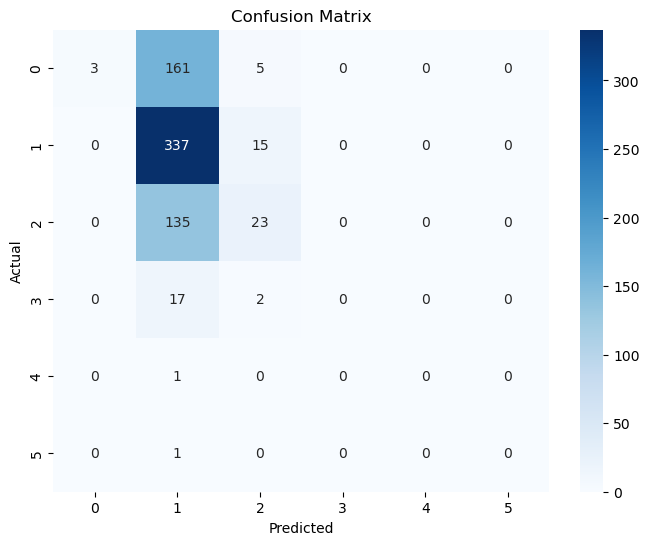

In [35]:
#switching to logistical regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#scale with StandardScaler
scaler = StandardScaler()

#scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

#transform data
X_test_scaled = scaler.transform(X_test)

#independent variables and dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(solver='sag', max_iter=2000)
model.fit(X_train, y_train)

#make predictions
y_pred = model.predict(X_test)

#model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#extra evaluations and print conf matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree:

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_text

# mergedRF with columns of interest
mergedRF = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT', 'HHAUTO_N']].copy()

# X & y
X = mergedRF.drop('HHAUTO_N', axis=1)
y = mergedRF['HHAUTO_N']

# training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forrest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

model_rf.fit(X, y)
model_rf.score(X, y)

# decision tree after fitting it with values from random forest
model_rf_dt = DecisionTreeRegressor(random_state=42)
model_rf_dt.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculates mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# get tree rules
tree_rules = export_text(model_rf_dt, feature_names=list(X.columns))
print(tree_rules)

#g ets feature importances and puts them into a df
feature_importances = model_rf_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_df.head(20))



###next steps:
#remove uninteresting (too obvious) columns - eryk
#implement random forest - eryk
#add p value to feature_importance_df with packagae: model_selection.permutation_test_score - emma
#interpret - emma
#visualize important features - emma



Mean Squared Error: 0.6314285714285715
|--- HHBRUTOINK2_w5 <= 2.50
|   |--- STED_GM <= 3.50
|   |   |--- N_KIND <= 0.50
|   |   |   |--- HHBRUTOINK2_w5 <= 1.50
|   |   |   |   |--- OPLEIDING <= 3.50
|   |   |   |   |   |--- OPLEIDING <= 2.00
|   |   |   |   |   |   |--- STED_GM <= 1.50
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- STED_GM >  1.50
|   |   |   |   |   |   |   |--- STED_GM <= 2.50
|   |   |   |   |   |   |   |   |--- GESLACHT <= 1.50
|   |   |   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |   |   |   |--- GESLACHT >  1.50
|   |   |   |   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |   |   |--- STED_GM >  2.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- OPLEIDING >  2.00
|   |   |   |   |   |   |--- STED_GM <= 1.50
|   |   |   |   |   |   |   |--- GESLACHT <= 1.50
|   |   |   |   |   |   |   |   |--- value: [0.67]
|   |   |   |   |   |   |   |--- GESLACHT >  1.50
|   |   |   |  

,Feature,Importance
0,HHBRUTOINK2_w5,0.316577
3,OPLEIDING,0.273026
1,STED_GM,0.188276
2,N_KIND,0.126043
4,GESLACHT,0.096078


Information over values of variables from MPN website

HHAUTO_N
- Number of cars in the household
- directly measured
- Integer
- Value Range: 0.0 to 6.0

HHBRUNTOINK2_w5
- Gross annual household income aggregated	
- directly measured

- 1	minimum (< € 14,100)
- 2	below the national benchmark income (€ 14,100 - < € 29,500)
- 3	national benchmark income (€ 29,500 - < € 43,500)
- 4	1-2x the national benchmark income (€ 43,500 - < € 73,000)
- 5	2x the national benchmark income (€ 73,000 - < € 87,100)
- 6	more than 2x the national benchmark income (>= € 85,100)
- 7	Do not know / do not want to say



STEM_GM 
- Urbanity
- preloaded

- 1	Very highly urbanized (2500 or more inhabitants/km²)
- 2	Highly urbanized (1500 to 2500 inhabitants/km²)
- 3	Moderately urbanized (1000 to 1500 inhabitants/km²)
- 4	Low urbanization (500 to 1000 inhabitants/km²)
- 5	Non-urbanized area (Less than 500 inhabitants/km²)


N_KIND 
- Number of children <12 years old in the household	
- Integer
- Value Range: 0.0 to 5.0

OPLEIDING
- Highest completed education level	
- preloaded 

- 1	no education/ primary education
- 3	LBO \ VBO \ VMBO (vocational educational programs)
- 4	MAVO\1st 3 years HAVO-VWO\VMBO (junior years high school education)
- 5	MBO
- 6	HAVO and VWO senior high school year(s) \ university propaedeutic diploma
- 7	HBO\WO (Bachelor's degree)
- 8	HBO / WO master's or doctoral degree
- 9	Don't know \ won't say
- 99 person did not complete the questionnaire
- 999 No data known, no imputation from 2018 possible

GESLACHT
- gender
- preloaded

- 1 Man
- 2 Woman



turnt into categroical 
replace 7 with most likely category (highert frequency)
pick one of these cats and do nto include first variable to put on baseline
to do this in python for the 2nd column onwoards 6 separate if else function make them 1 if number 0 if otherwise, these become dummy vectors, the baseline will be determined by the first column then

except numerical ordinal values
numebr of cars, number of children



In [ ]:
#LINEAR REGRESSION MODEL WITH STATSMODELS OUTPUT - WITH REMOVED 
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import numpy as np


# X contains the independent variables, y contains the dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT']]
y = merged['HHAUTO_N']

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
summary = model.summary()
print(summary)

# Print coefficients
print("Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept}")


                            OLS Regression Results                            
Dep. Variable:               HHAUTO_N   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     89.91
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.15e-89
Time:                        15:32:39   Log-Likelihood:                -3856.1
No. Observations:                3500   AIC:                             7724.
Df Residuals:                    3494   BIC:                             7761.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2709      0.054      5.

In [ ]:
# Replacing values in OPLEIDING column
most_frequent_opleiding = merged['OPLEIDING'].mode()[0]
merged['OPLEIDING'].replace([9, 99, 999], most_frequent_opleiding, inplace=True)

# Replacing value in HHBRUTOINK2_w5 column
most_frequent_hhbrutoink = merged['HHBRUTOINK2_w5'].mode()[0]
merged['HHBRUTOINK2_w5'].replace(7, most_frequent_hhbrutoink, inplace=True)


In [ ]:
import numpy as np

# Define the columns to be converted into categorical variables
columns_to_convert = ['HHBRUTOINK2_w5', 'STED_GM', 'OPLEIDING', 'GESLACHT', ]

# Iterate through each column and create dummy variables
for column in columns_to_convert:
    unique_values = sorted(merged[column].unique())  # Get unique values in ascending order
    
    # Set the first value as the baseline
    baseline = unique_values[0]
    
    # Loop through unique values starting from the second one
    for value in unique_values[1:]:
        # Create a new column for each unique value with 1s and 0s
        new_column_name = f'CAT_{column}_{value}'  # Create a new column name
        
        # Use np.where to create dummy variables (1s and 0s)
        merged[new_column_name] = np.where(merged[column] == value, 1, 0)


In [ ]:
#LINEAR REGRESSION MODEL WITH STATSMODELS OUTPUT - WITH REMOVED 
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
import numpy as np


# X contains the independent variables, y contains the dependent variable
X = merged[['HHBRUTOINK2_w5', 'STED_GM', 'N_KIND', 'OPLEIDING', 'GESLACHT', 'CAT_HHBRUTOINK2_w5_1.0',
'CAT_HHBRUTOINK2_w5_2.0',
'CAT_HHBRUTOINK2_w5_3.0',
'CAT_HHBRUTOINK2_w5_4.0',
'CAT_HHBRUTOINK2_w5_5.0',
'CAT_HHBRUTOINK2_w5_6.0',
'CAT_STED_GM_2.0',
'CAT_STED_GM_3.0',
'CAT_STED_GM_4.0',
'CAT_STED_GM_5.0',
'CAT_OPLEIDING_3.0',
'CAT_OPLEIDING_4.0',
'CAT_OPLEIDING_5.0',
'CAT_OPLEIDING_6.0',
'CAT_OPLEIDING_7.0',
'CAT_OPLEIDING_8.0',
'CAT_GESLACHT_2.0']]

y = merged['HHAUTO_N']

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
summary = model.summary()
print(summary)

# Print coefficients
print("Coefficients:")
print(coefficients_df)
print(f"\nIntercept: {intercept}")


                            OLS Regression Results                            
Dep. Variable:               HHAUTO_N   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     38.49
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          7.65e-123
Time:                        15:32:41   Log-Likelihood:                -3750.2
No. Observations:                3500   AIC:                             7538.
Df Residuals:                    3481   BIC:                             7655.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
# Set the target variable
y = merged['HHAUTO_N']

# Ordinal column
X_ord = merged[['N_KIND']]

# Categorical columns
categorical_columns = ['STED_GM', 'OPLEIDING', 'GESLACHT', 'HHBRUTOINK2_w5']

# Convert columns to categorical type
for col in categorical_columns:
    merged[col] = merged[col].astype('category')

# Convert categorical columns to dummies
X_cat = pd.get_dummies(merged[categorical_columns], drop_first=True)

# Concatenate ordinal and dummy variables
X_final = pd.concat([X_ord, X_cat], axis=1)

# Fit the regression model
model = sm.OLS(y, sm.add_constant(X_final)).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               HHAUTO_N   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     38.49
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          7.65e-123
Time:                        15:32:43   Log-Likelihood:                -3750.2
No. Observations:                3500   AIC:                             7538.
Df Residuals:                    3481   BIC:                             7655.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6288      0